In [10]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from itertools import chain
from scipy.stats import multivariate_normal
import cv2
from PIL import Image

## Example 1: 1-Dimensional Gaussian Mixture:

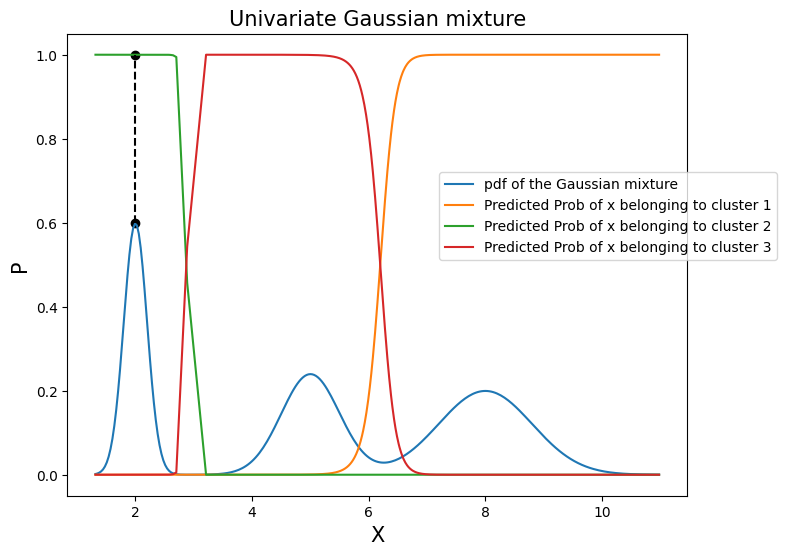

In [2]:
means=[2,5,8]
stds=[0.2, 0.5, 0.8]
weights=[0.3, 0.3, 0.4]

mixture_idx = np.random.choice(3, size=10000, replace=True, p=weights)
# generate 10000 possible values of the mixture
X = np.fromiter((ss.norm.rvs(loc=means[i], scale=stds[i]) for i in mixture_idx), dtype=np.float64)

# create x axis of the plot 
xs = np.linspace(X.min(), X.max(), 300)
ps = np.zeros_like(xs)

for mu, s, w in zip(means, stds, weights):
    ps += ss.norm.pdf(xs, loc=mu, scale=s) * w

# sort X in ascending order for plotting purpose
X_sorted = np.sort(X.reshape(-1)).reshape(-1,1)

# fit the GMM
GMM = GaussianMixture(n_components=3, random_state=10)
GMM.fit(X_sorted)

# store the predicted probabilities in y1_prob
probs = GMM.predict_proba(X_sorted)

# plot the Gaussian mixture pdf
plt.figure(figsize=(8,6))
plt.plot(xs, ps, label='pdf of the Gaussian mixture')
plt.xlabel("X", fontsize=15)
plt.ylabel("P", fontsize=15)
plt.title("Univariate Gaussian mixture", fontsize=15)

# plot the predicted prior probabilities
plt.plot(X_sorted, probs[:,0], label='Predicted Prob of x belonging to cluster 1')
plt.plot(X_sorted, probs[:,1], label='Predicted Prob of x belonging to cluster 2')
plt.plot(X_sorted, probs[:,2], label='Predicted Prob of x belonging to cluster 3')
plt.scatter(2, 0.6, color='black')
plt.scatter(2, 1.0, color='black')
plt.plot([2, 2], [0.6, 1.0],'--', color='black')
plt.legend(bbox_to_anchor=(0.6,0.7), borderaxespad=0)

## Example 2: 2-Dimensional Gaussian Mixture:

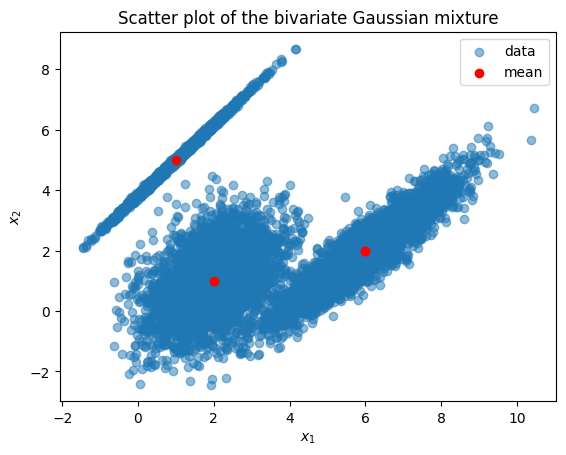

In [4]:
# Mean and covariance definitions
means = [(1, 5), (2, 1), (6, 2)]
cov1 = np.array([[0.5, 0.9], [0.9, 0.8]])  # Adjusted to be positive semidefinite
cov2 = np.array([[0.8, 0.4], [0.4, 1.2]])
cov3 = np.array([[1.3, 1.2], [1.2, 1.3]])  # Adjusted to be positive semidefinite
covs = [cov1, cov2, cov3]
weights = [0.3, 0.3, 0.4]

# Function to ensure covariance matrices are positive semidefinite
def make_positive_semidefinite(matrix):
    # Calculate the eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(matrix)
    # Set any negative eigenvalues to a small positive number
    eigvals[eigvals < 0] = 0.001
    # Reconstruct the covariance matrix
    return eigvecs @ np.diag(eigvals) @ eigvecs.T

# Ensure all covariance matrices are positive semidefinite
covs = [make_positive_semidefinite(cov) for cov in covs]

# Generate data from the mixture model
mixture_idx = np.random.choice(3, size=10000, replace=True, p=weights)

X = np.fromiter(
    chain.from_iterable(
        multivariate_normal.rvs(mean=means[i], cov=covs[i]) for i in mixture_idx
    ),
    dtype=float,
)
X.shape = (10000, 2)

# Plotting
xs1 = X[:, 0]
xs2 = X[:, 1]

plt.scatter(xs1, xs2, label="data", alpha=0.5)

L = len(means)
for l, pair in enumerate(means):
    plt.scatter(pair[0], pair[1], color='red')
    if l == L - 1:
        break
plt.scatter(pair[0], pair[1], color='red', label="mean")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter plot of the bivariate Gaussian mixture")
plt.legend()
plt.show()


## Example 3: Image Segmentation

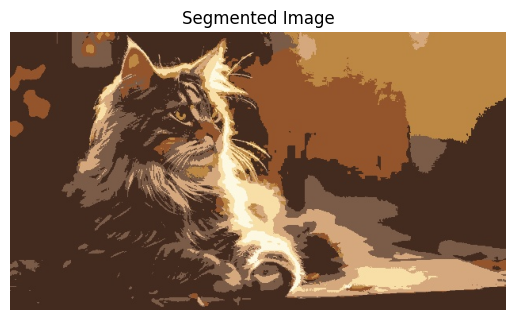

In [13]:
from sklearn.mixture import GaussianMixture as GMM
img = cv2.imread('cat.jpg')
# If img is greyscale, then change to .reshape(-1, 1):
x = img.reshape(-1, 3)
# The number of components; you can change this to a positive integer of your choice!:
n = 8
gmm = GMM(n_components=n, covariance_type='tied')
gmm.fit(x)
labels = gmm.predict(x)
seg = np.zeros(x.shape)
for label in range(n):
    seg[labels == label] = gmm.means_[label]
seg = seg.reshape(img.shape).astype(np.uint8)
cv2.imwrite(f'gauss-cat-{n}.jpeg', seg)

# Read the saved image
output_path = f'gauss-cat-{n}.jpeg'
img = cv2.imread(output_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.title('Segmented Image')
plt.axis('off')  # Turn off axis labels
plt.show()